In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartdisease/heart.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/kaggle/input/heartdisease/heart.csv')
df.head(20)




,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Let's check the shape of our dataset
df.shape

(303, 14)

In [7]:
# check if there are null values in our dataset
df.isnull().mean()

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [8]:
#check if there are duplicated values in our dataset
print("We have only 1 duplicated value in our dataset")
df.duplicated().sum()


We have only 1 duplicated value in our dataset


1

In [9]:
# Delete the duplicated value
df = df.drop_duplicates()

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


output
1    164
0    138
Name: count, dtype: int64
 1---> heart disease   0---> no heart disease


<Axes: xlabel='output'>

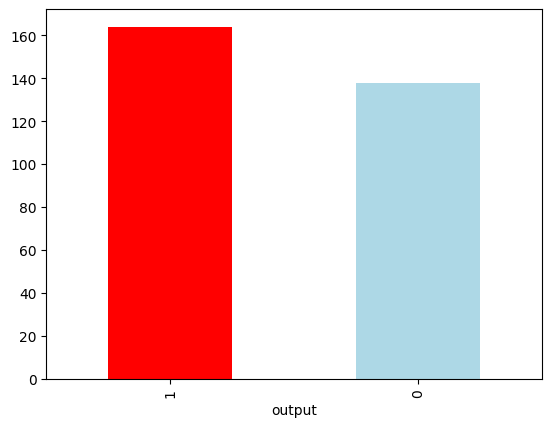

In [11]:
# Ratio for healthy and no healthy
print(df.output.value_counts())
print(" 1---> heart disease   0---> no heart disease")
df.output.value_counts().plot(kind = "bar", color = ["red", "lightblue"])

In [12]:
# ratio male and female
print("1---> male, 0----> female")
df.sex.value_counts()


1---> male, 0----> female


sex
1    206
0     96
Name: count, dtype: int64

In [13]:
#Distribution disease according to sex
print("114 ----> males with no heart disease, 92-----> males with heart issue")
print("24----> females with no heart issue, 72-----> females with heart issue")
pd.crosstab(df.output, df.sex)

114 ----> males with no heart disease, 92-----> males with heart issue
24----> females with no heart issue, 72-----> females with heart issue


sex,0,1
output,,
0,24,114
1,72,92


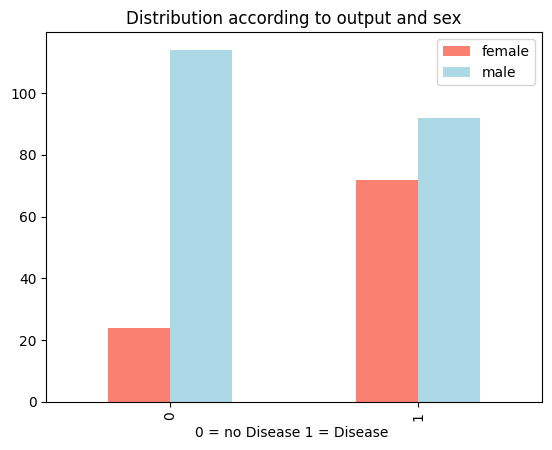

In [14]:
# illustration using barchat
pd.crosstab(df.output, df.sex).plot(kind = "bar", color = ["salmon", "lightblue"])
plt.title("Distribution according to output and sex")
plt.xlabel("0 = no Disease 1 = Disease ")
plt.legend(["female", "male"])

Text(0, 0.5, 'Fredency')

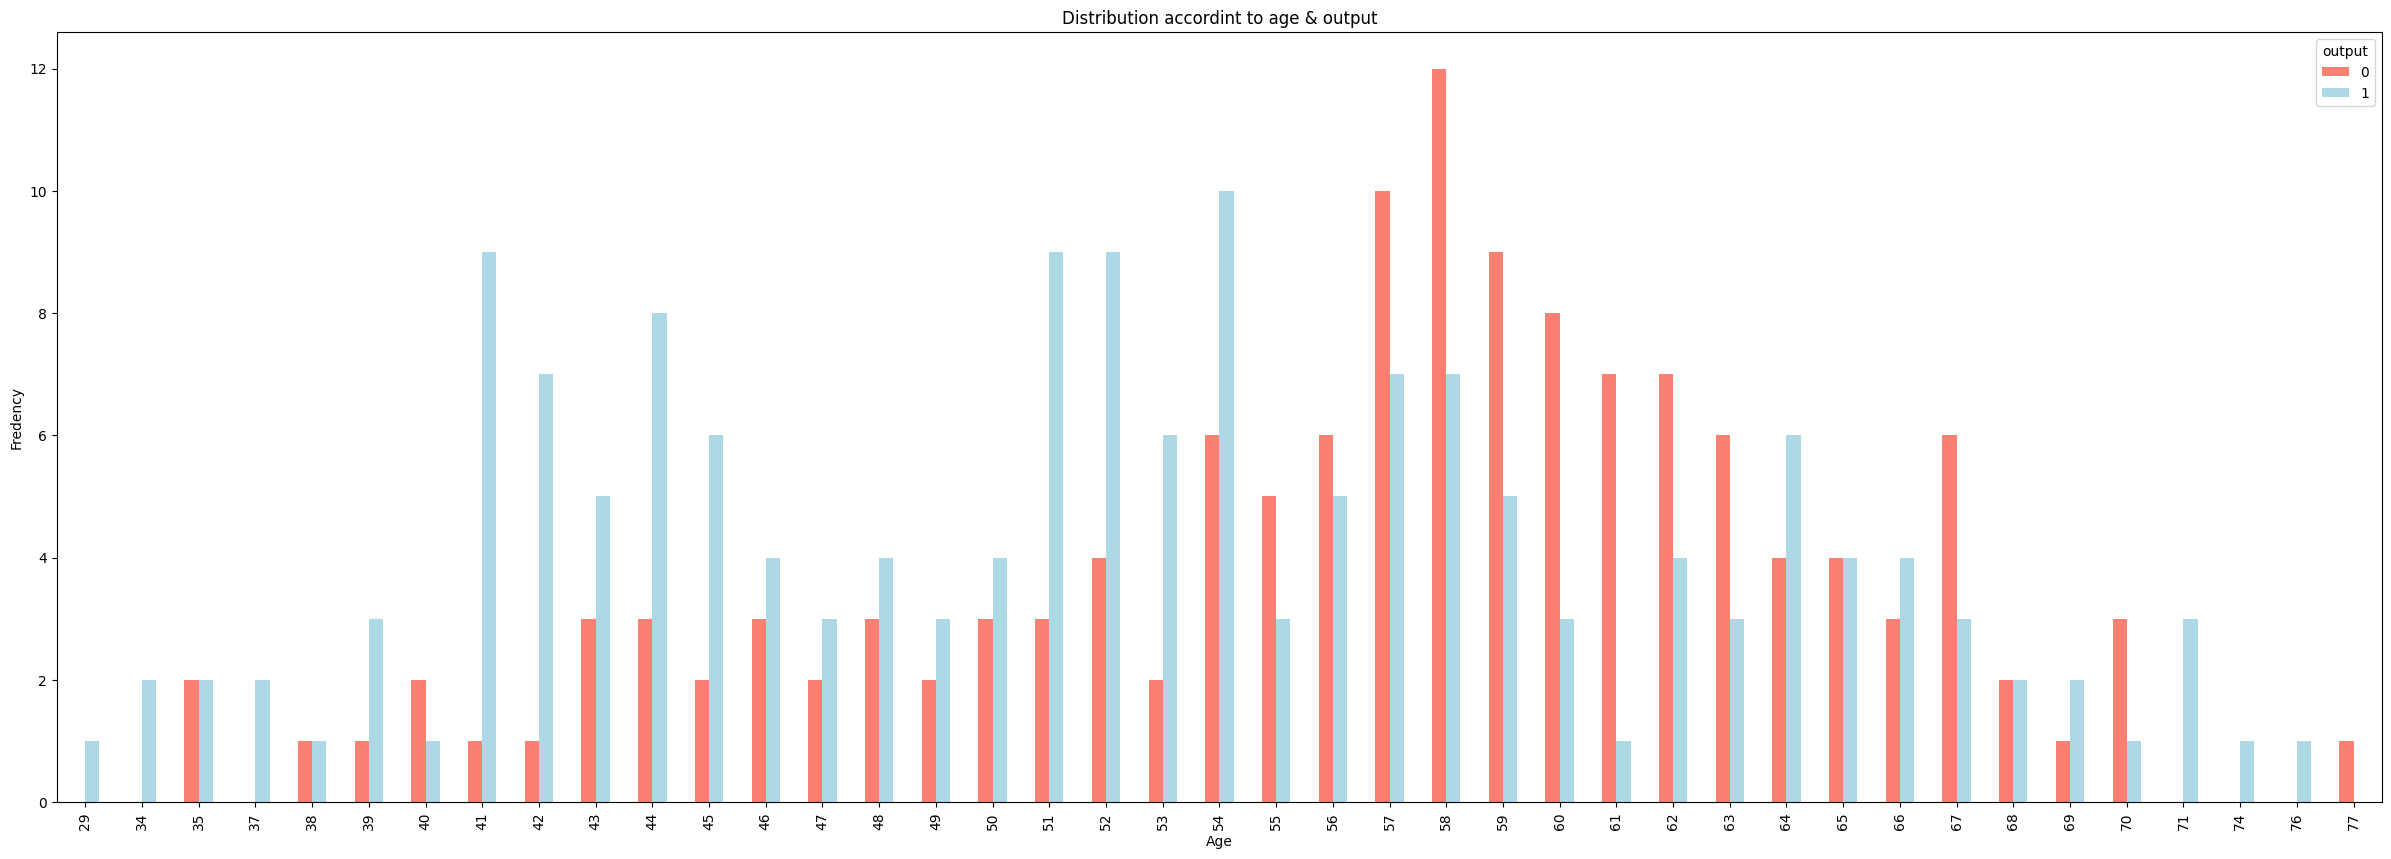

In [15]:
#Distribution accordint to age & output
pd.crosstab(df.age, df.output).plot(kind = "bar",figsize=(30,10) ,color = ["salmon", "lightblue"])
plt.title("Distribution accordint to age & output")
plt.xlabel("Age")
plt.ylabel("Fredency")


<Axes: >

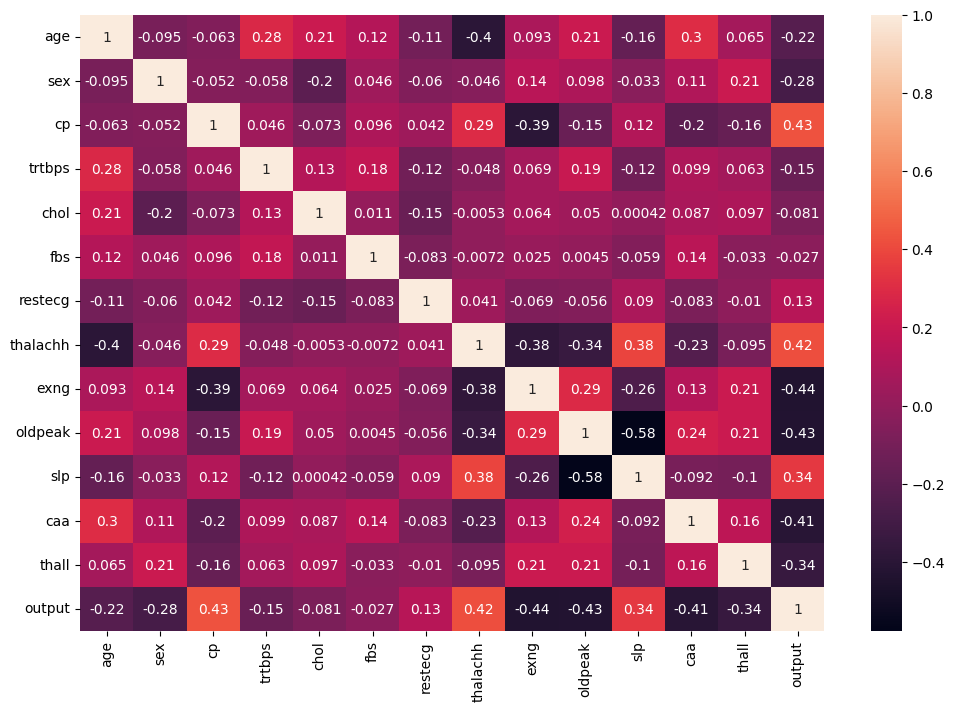

In [16]:
#let's check the correlation between variables
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

In [17]:
#function to check to outliers (histogram, boxplot)
def plotvariable(df, variable):
    plt.figure(figsize= (16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.title(variable)
    plt.hist(df[variable], alpha = 0.5)
    #boxplot
    plt.subplot(1,2,2)
    plt.title(variable)
    sns.boxplot(df[variable])
    
    
    

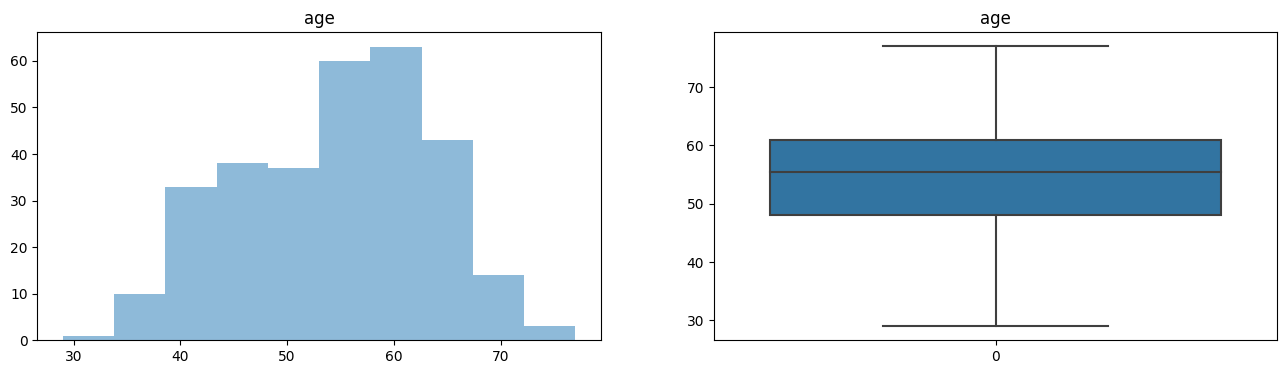

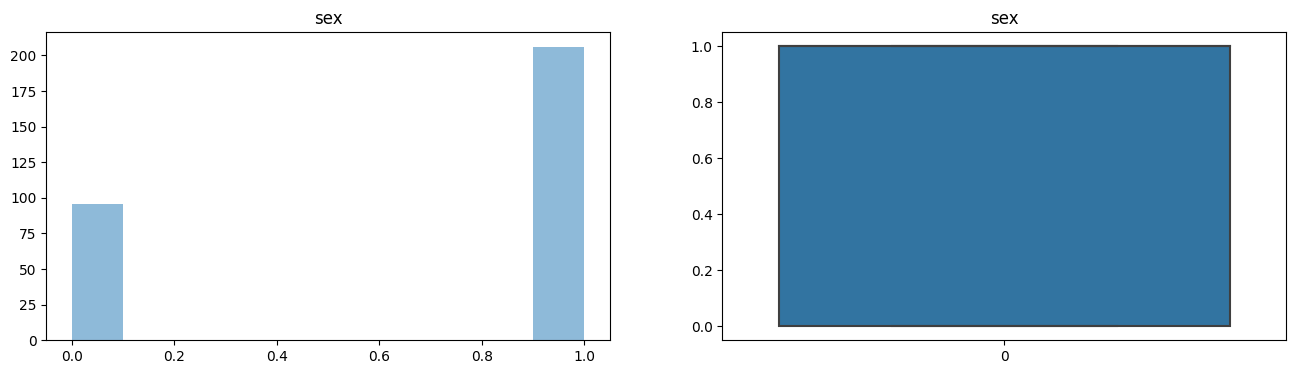

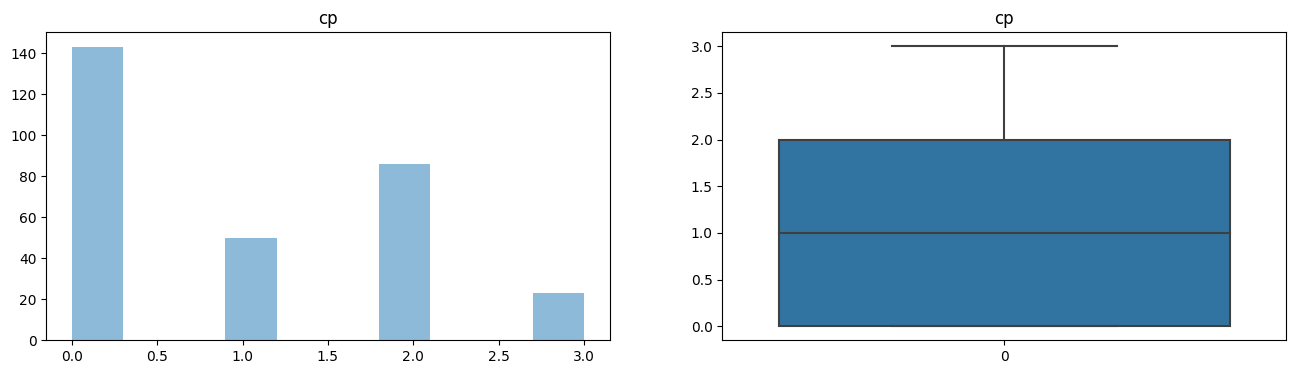

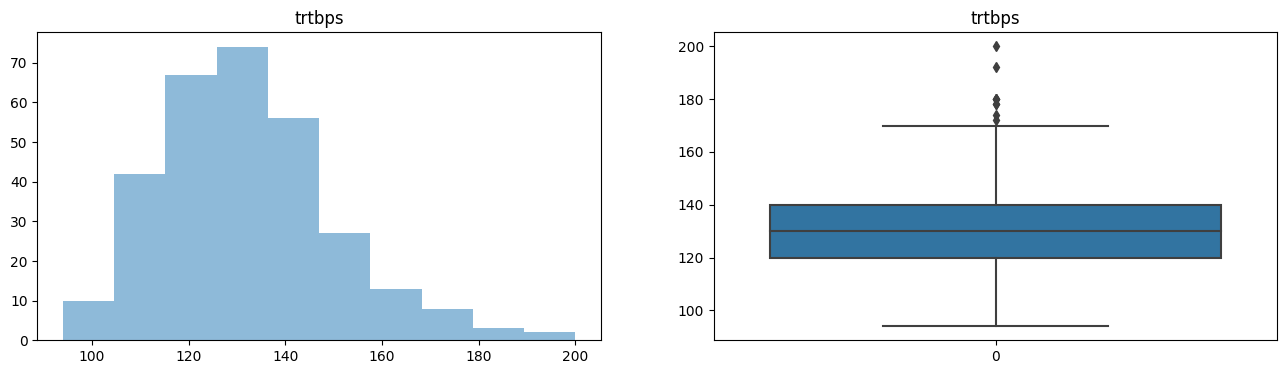

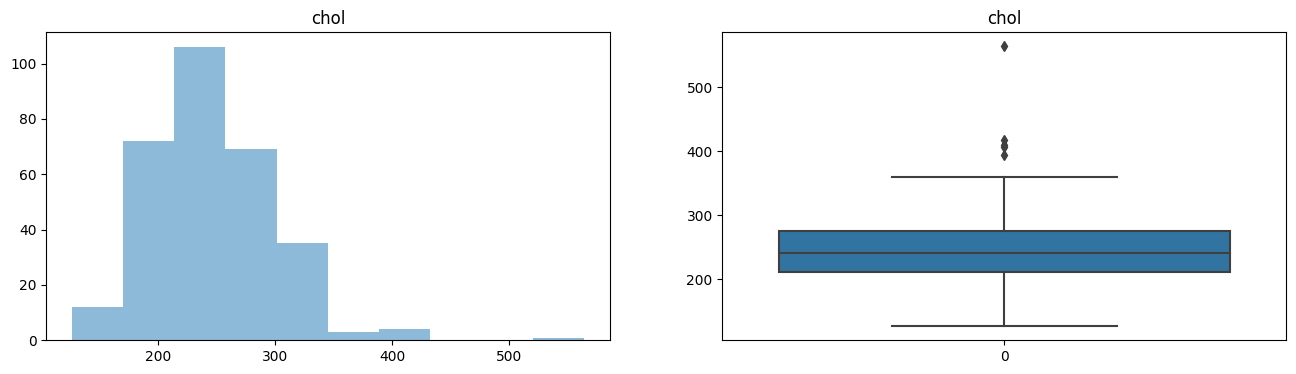

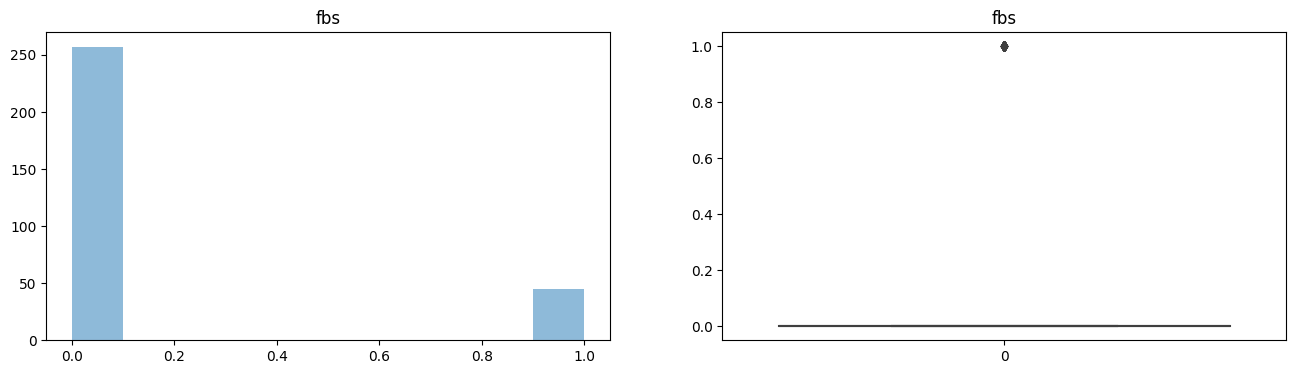

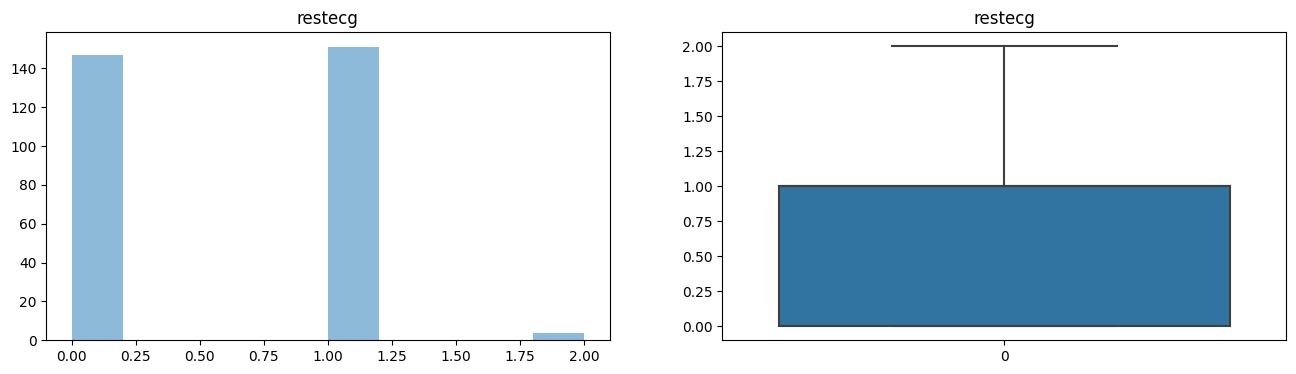

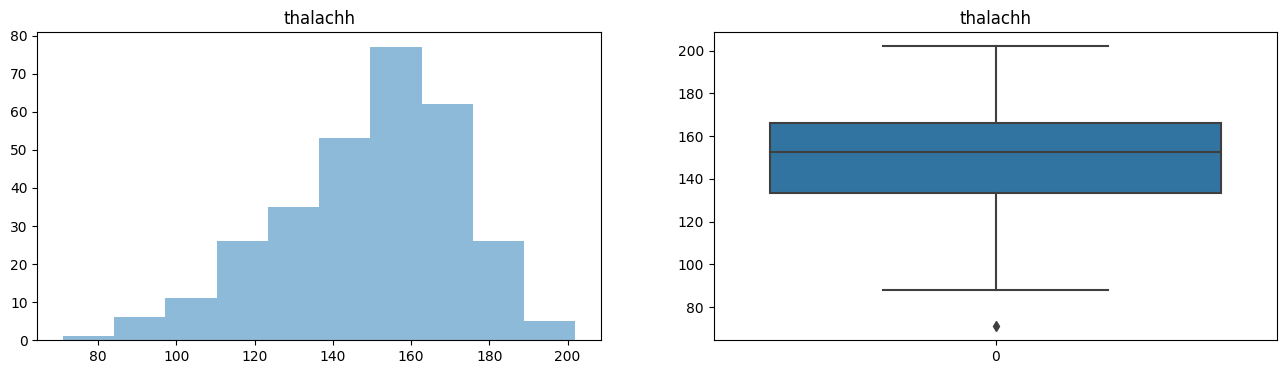

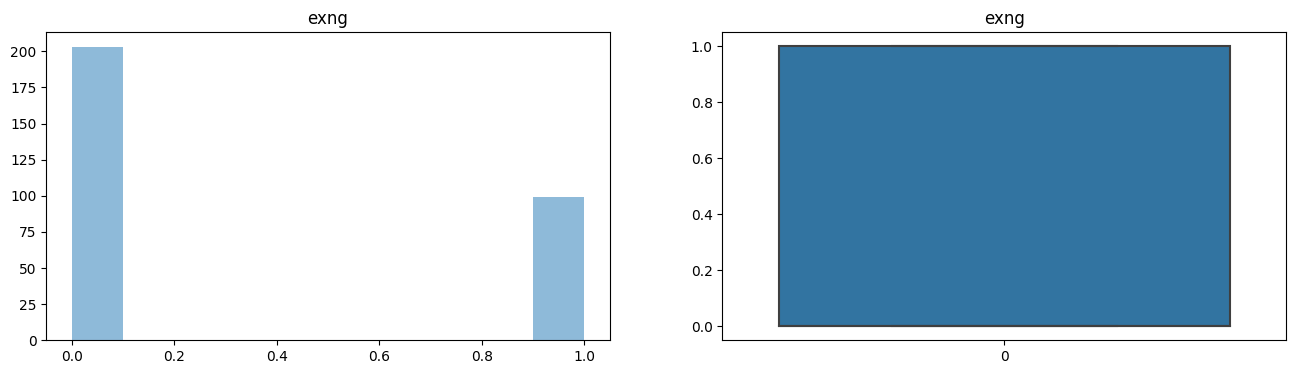

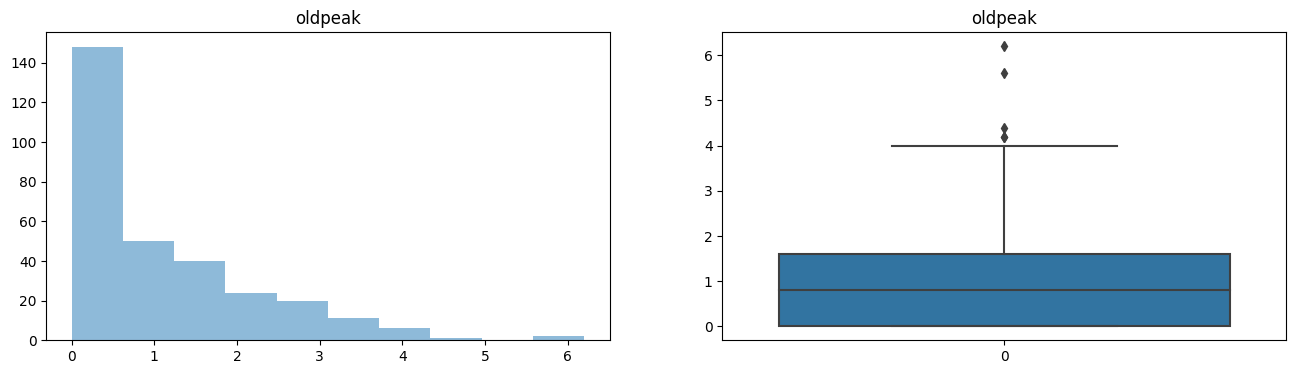

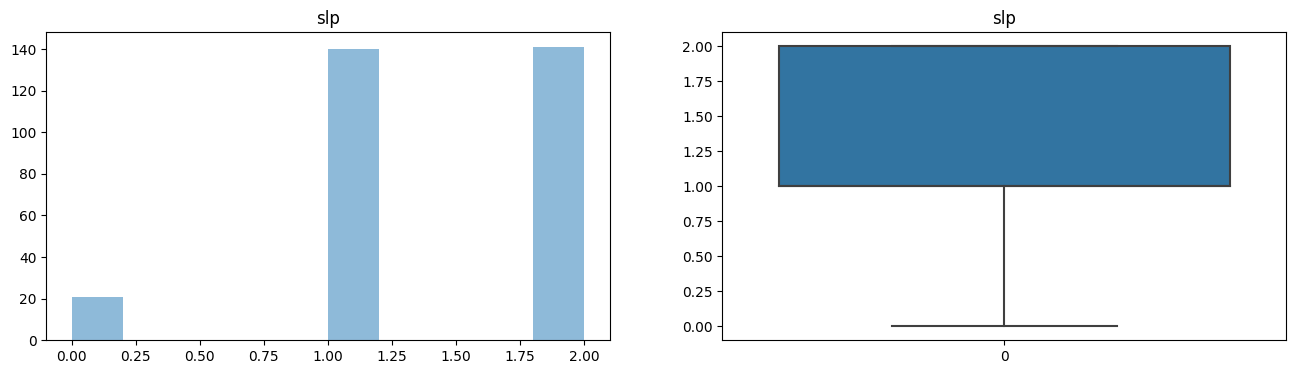

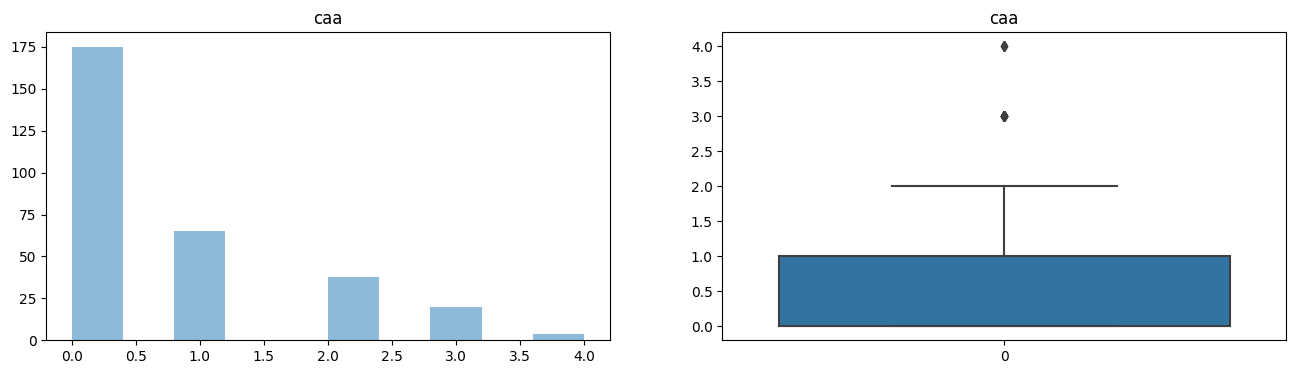

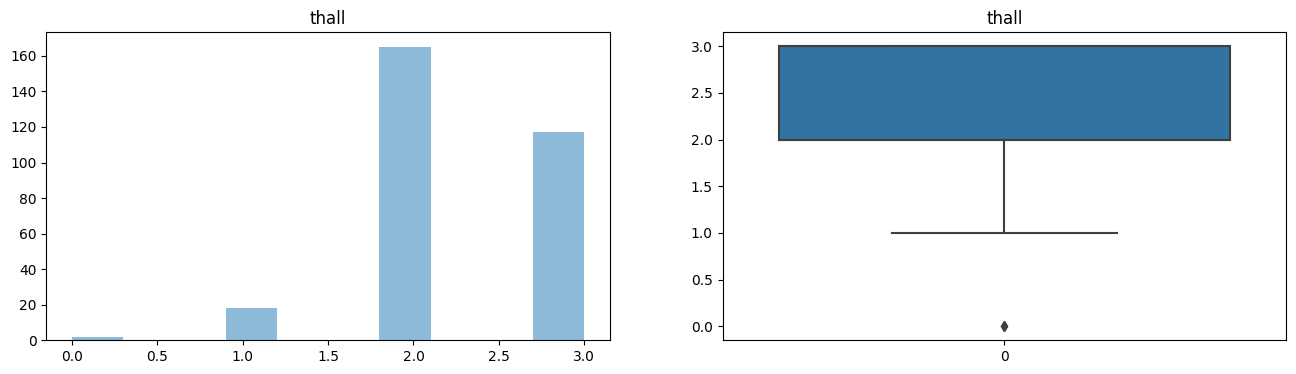

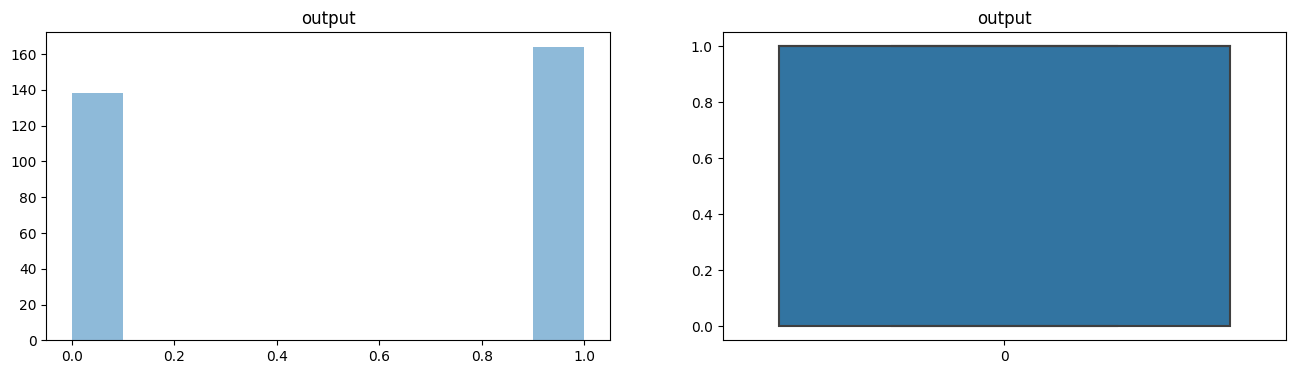

In [18]:
#Let's check how our data are distributed
for columns in df.columns:
    plotvariable(df, columns)

In [19]:
# create a copy of our dataset
data1 = df.copy()
data_new = pd.get_dummies(data1, columns = ['cp', 'slp', 'thall','restecg']) 


In [20]:

data_new

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,False,False,False,True,True,False,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,False,False,True,False,True,False,False,False,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,False,True,False,False,False,False,True,False,False,True,False,True,False,False
3,56,1,120,236,0,178,0,0.8,0,1,False,True,False,False,False,False,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,True,False,False,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,True,False,False,False,False,True,False,False,False,False,True,False,True,False
299,45,1,110,264,0,132,0,1.2,0,0,False,False,False,True,False,True,False,False,False,False,True,False,True,False
300,68,1,144,193,1,141,0,3.4,2,0,True,False,False,False,False,True,False,False,False,False,True,False,True,False
301,57,1,130,131,0,115,1,1.2,1,0,True,False,False,False,False,True,False,False,False,False,True,False,True,False


In [21]:
data_new1 = data_new.copy()
data_new1['cp_0'] = data_new1['cp_0'].astype(int)

In [22]:
data1 = data_new1*1
#W multiply our dataset by 1 to get rid our boolean values and get only O and 1

In [23]:
#Our new dataset preview
data1

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,2,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


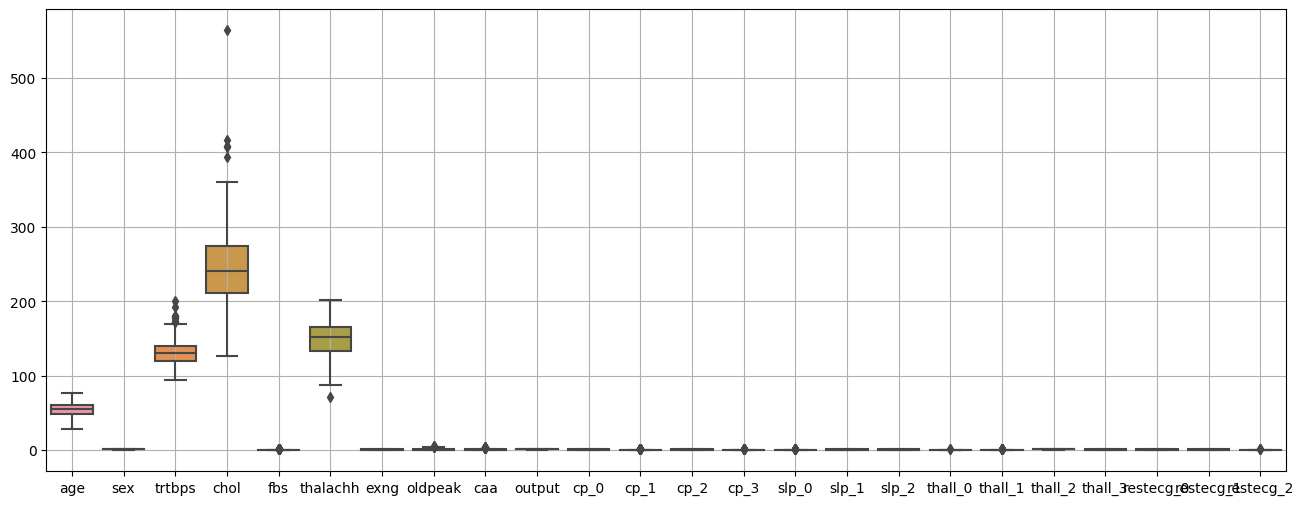

In [24]:
# let's deal with outliers
plt.figure(figsize = (16,6))
sns.boxplot(data = data1)
plt.grid()
plt.show()

In [25]:
def impute_outliers(data1, colname):
    q1 = np.percentile(data1[colname], 25)
    q3 = np.percentile(data1[colname], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    data1.loc[(data1[colname] < lower_bound), colname] = lower_bound
    data1.loc[(data1[colname] > upper_bound), colname] = upper_bound

In [26]:
for colname in data1.columns:
    impute_outliers(data1, colname)

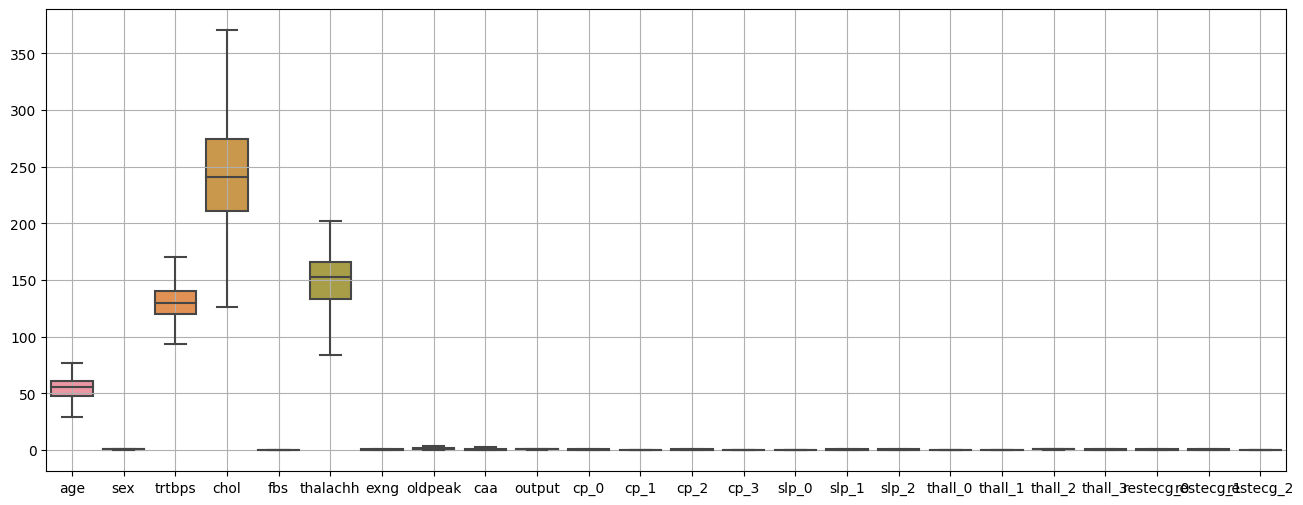

In [27]:
plt.figure(figsize = (16,6))
sns.boxplot(data = data1)
plt.grid()
plt.show()

In [28]:
data1.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2
0,63.0,1.0,145,233.0,0,150.0,0.0,2.3,0.0,1.0,0.0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0
1,37.0,1.0,130,250.0,0,187.0,0.0,3.5,0.0,1.0,0.0,0,1.0,0,0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0
2,41.0,0.0,130,204.0,0,172.0,0.0,1.4,0.0,1.0,0.0,0,0.0,0,0,0.0,1.0,0,0,1.0,0.0,1.0,0.0,0
3,56.0,1.0,120,236.0,0,178.0,0.0,0.8,0.0,1.0,0.0,0,0.0,0,0,0.0,1.0,0,0,1.0,0.0,0.0,1.0,0
4,57.0,0.0,120,354.0,0,163.0,1.0,0.6,0.0,1.0,1.0,0,0.0,0,0,0.0,1.0,0,0,1.0,0.0,0.0,1.0,0


In [29]:
#We convert all our variable into Int type
df_new = data1.apply(lambda column: column.astype(int))


In [30]:
df_new

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,0,150,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
300,68,1,144,193,0,141,0,3,2,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [31]:
# We import our libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn. preprocessing import PolynomialFeatures


In [32]:
x = df_new.drop('output', axis = 1)
y = df_new['output']

In [33]:
x

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,0,150,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
300,68,1,144,193,0,141,0,3,2,1,0,0,0,0,1,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [36]:
model1 = make_pipeline(MinMaxScaler(),
                      LogisticRegression())

model1.fit(x_train, y_train)
model1_pred = model1.predict(x_test)

In [37]:
model1.score(x_test, y_test)

0.8852459016393442

In [38]:
CM1  = confusion_matrix(y_test, model1_pred)
CM1

array([[24,  3],
       [ 4, 30]])

<Axes: >

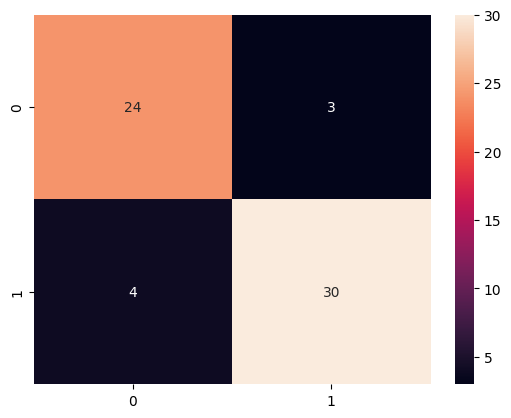

In [39]:
sns.heatmap(CM1, annot=True)

In [40]:
print(classification_report(y_test, model1_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [41]:
Model2 = make_pipeline(StandardScaler(),
                      DecisionTreeClassifier())

Model2.fit(x_train, y_train)
Model2_pred = Model2.predict(x_test)

In [42]:
Model2.score(x_test, y_test)

0.7540983606557377

In [43]:
CM2 = confusion_matrix(y_test, Model2_pred)
CM2

array([[23,  4],
       [11, 23]])

<Axes: >

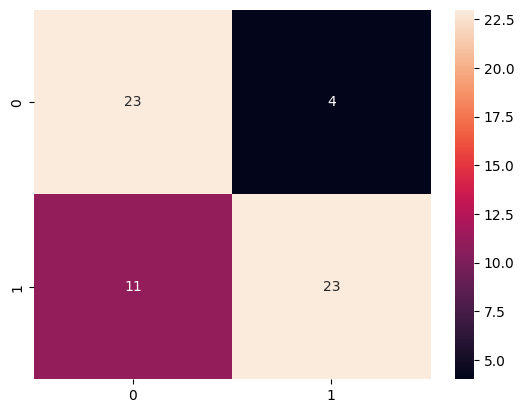

In [44]:
sns.heatmap(CM2, annot = True)

In [45]:
print(classification_report(y_test, Model2_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75        27
           1       0.85      0.68      0.75        34

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [46]:
Model3 = make_pipeline(StandardScaler(),
                      RandomForestClassifier())

Model3.fit(x_train, y_train)
Model3_pred = Model3.predict(x_test)

In [47]:
Model3.score(x_test, y_test)

0.8524590163934426

In [48]:
Model4 = make_pipeline(StandardScaler(),
                      KNeighborsClassifier())

Model4.fit(x_train, y_train)
Model4_pred = Model4.predict(x_test)

In [49]:
Model4.score(x_test, y_test)

0.8688524590163934